<a href="https://colab.research.google.com/github/sameer-nema/Data-Analysis-Internship/blob/main/Covid_19_Impact_on_airport_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**

In [5]:
from datetime import date
import os

# import geopandas as gpd
# import geoplot as gplt
# import folium
# import mapclassify
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np 
import pandas as pd 
import plotly.express as px
import re
import seaborn as sns
from shapely.geometry import Point, Polygon
from shapely.geometry import MultiPolygon

In [1]:
%matplotlib inline

## **Importing & Understanding the Dataset**

In [33]:
covid_impact_on_airport_traffic = pd.read_csv("covid_impact_on_airport_traffic.csv")

In [7]:
covid_impact_on_airport_traffic.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [8]:
covid_impact_on_airport_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


In [9]:
covid_impact_on_airport_traffic.isnull().sum()

AggregationMethod    0
Date                 0
Version              0
AirportName          0
PercentOfBaseline    0
Centroid             0
City                 0
State                0
ISO_3166_2           0
Country              0
Geography            0
dtype: int64

In [10]:
covid_impact_on_airport_traffic['Country'].unique()

array(['Australia', 'Chile', 'Canada', 'United States of America (the)'],
      dtype=object)

In [24]:
covid_impact_on_airport_traffic['AirportName'].unique()

array(['Kingsford Smith', 'Santiago International Airport',
       'Calgary International', 'Edmonton International',
       'Vancouver International', 'Winnipeg International',
       'Halifax International', 'Toronto Pearson',
       'Hamilton International', 'Montreal Mirabel', 'Montreal Trudeau',
       'Los Angeles International', 'San Francisco International',
       'Denver International', 'Miami International ',
       'Hartsfield-Jackson Atlanta International ',
       'Daniel K. Inouye International ', 'Chicago OHare International',
       'Boston Logan International ',
       'Detroit Metropolitan Wayne County ',
       'Charlotte Douglas International', 'Newark Liberty International ',
       'McCarran International', 'LaGuardia',
       'John F. Kennedy International',
       'Dallas/Fort Worth International ',
       'Washington Dulles International ',
       'Seattle-Tacoma International '], dtype=object)

##**Preprocessing the Dataset**

In [34]:
covid_impact_on_airport_traffic["Date"] = covid_impact_on_airport_traffic["Date"].map(lambda x: date.fromisoformat(x))

In [35]:
covid_impact_on_airport_traffic["weekday"] = covid_impact_on_airport_traffic["Date"].map(lambda x: x.weekday())
w_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
covid_impact_on_airport_traffic["weekday"] = [w_list[idx] for idx in covid_impact_on_airport_traffic["weekday"]]

In [36]:
def cut_long(point):
    #point is like 'POINT(151.180087713813 -33.9459774986125)'
    long, _ = point[6:-1].split(" ")
    return float(long)

def cut_lat(point):
    #point is like 'POINT(151.180087713813 -33.9459774986125)'
    _, lat = point[6:-1].split(" ")
    return float(lat)

In [37]:
covid_impact_on_airport_traffic["long"] = covid_impact_on_airport_traffic["Centroid"].map(cut_long)
covid_impact_on_airport_traffic["lat"] = covid_impact_on_airport_traffic["Centroid"].map(cut_lat)

In [38]:
need_columns = [col for col in covid_impact_on_airport_traffic.columns if not col in ["AggregationMethod", "Version", "Centroid"]]
covid_impact_on_airport_traffic = covid_impact_on_airport_traffic[need_columns]

In [39]:
covid_impact_on_airport_traffic.head()

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country,Geography,weekday,long,lat
0,2020-04-03,Kingsford Smith,64,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Fri,151.180088,-33.945977
1,2020-04-13,Kingsford Smith,29,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Mon,151.180088,-33.945977
2,2020-07-10,Kingsford Smith,54,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Fri,151.180088,-33.945977
3,2020-09-02,Kingsford Smith,18,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Wed,151.180088,-33.945977
4,2020-10-31,Kingsford Smith,22,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Sat,151.180088,-33.945977


In [40]:
covid_impact_on_airport_traffic_preprocessed = covid_impact_on_airport_traffic

In [ ]:
covid_impact_on_airport_traffic_preprocessed.to_csv('covid_impact_on_airport_traffic_preprocessed.csv')

## **Initial Investigations**

**Univariate Analysis**

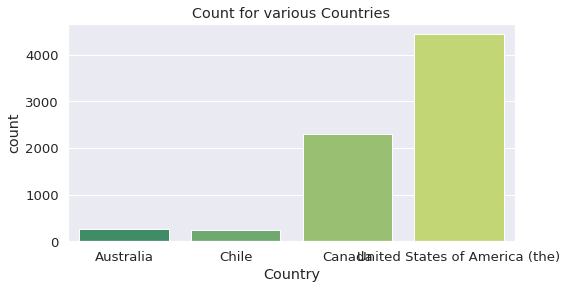

In [ ]:
plt.figure(figsize=(8,4))
fig4 = sns.countplot(x = 'Country', data = covid_impact_on_airport_traffic_preprocessed , palette='summer')
fig4.set_xticklabels(fig4.get_xticklabels())
fig4.set_title("Count for various Countries0")
plt.show();
# Maximum data points are for US followed by Canada. This is because the number of airports in US and Canada are probably more than Australia and Chile.

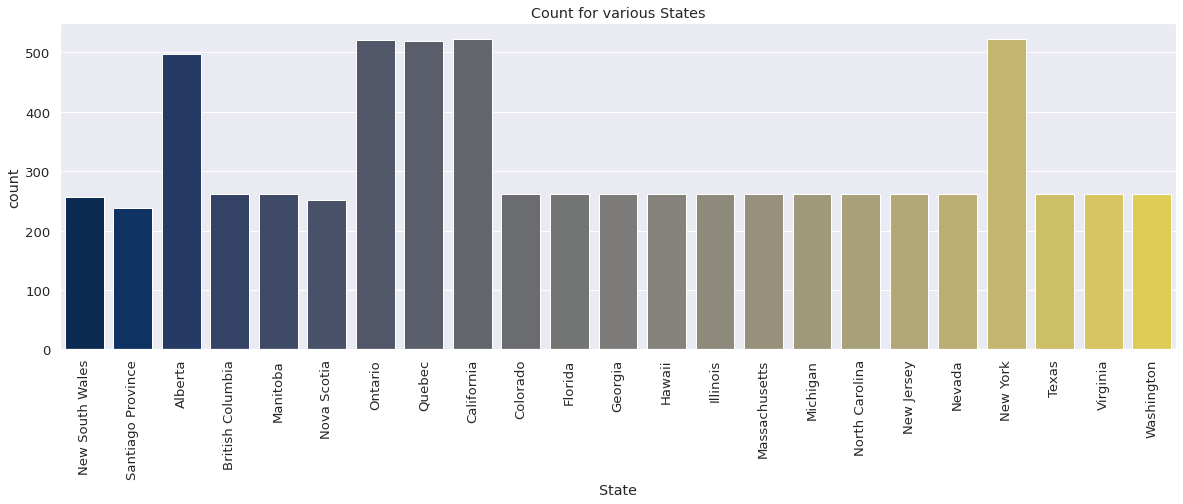

In [44]:
plt.figure(figsize=(20,6))
fig3 = sns.countplot(x = 'State', data = covid_impact_on_airport_traffic_preprocessed , palette='cividis')
fig3.set_xticklabels(fig3.get_xticklabels(), rotation=90)
fig3.set_title("Count for various States")
plt.show();
# Here, all states have equal counts in data except Alberta, Ontario, Quebec, California and New York. Again most likely reason must be the number of airports. 

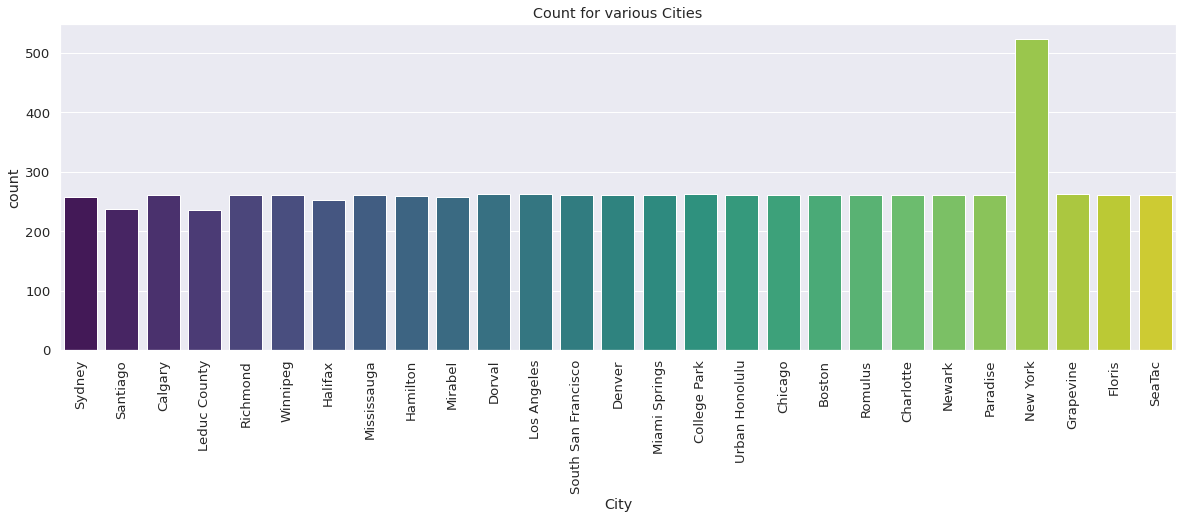

In [43]:
plt.figure(figsize=(20,6))
fig2 = sns.countplot(x = 'City', data = covid_impact_on_airport_traffic_preprocessed , palette='viridis')
fig2.set_xticklabels(fig2.get_xticklabels(), rotation=90)
fig2.set_title("Count for various Cities")
plt.show();
# This shows that all cities have more or less equal counts in data except New York. The most likely reason would be that it has more airports.

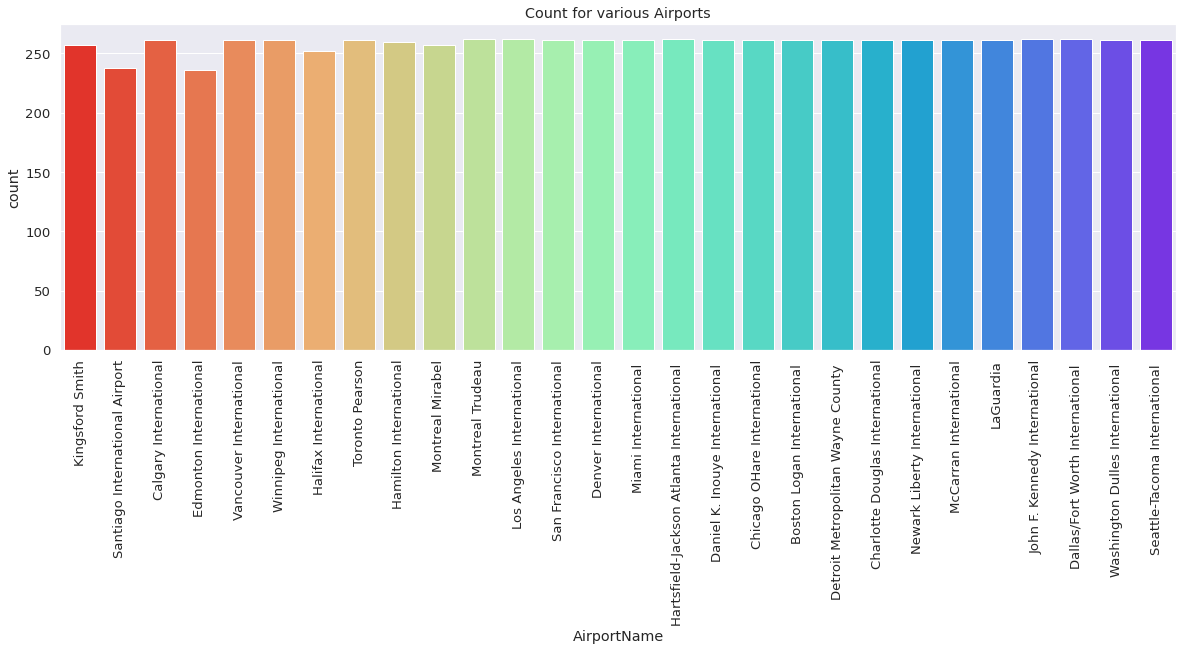

In [ ]:
plt.figure(figsize=(20,6))
fig1 = sns.countplot(x = 'AirportName', data = covid_impact_on_airport_traffic_preprocessed , palette='rainbow_r')
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=90)
fig1.set_title("Count for various Airports")
plt.show();
# This shows that there are around 250 data points on each airport except Santiago International Airport and Edmonton International

In [ ]:
covid_impact_on_airport_traffic_preprocessed.groupby("Country")[['State','City','AirportName']].nunique()

,State,City,AirportName
Country,,,
Australia,1,1,1
Canada,6,9,9
Chile,1,1,1
United States of America (the),15,16,17


**Number of records per month**

Text(0.5, 1.0, 'records for each month')

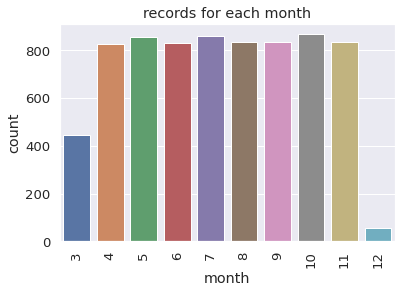

In [61]:
df_month_count = pd.DataFrame(covid_impact_on_airport_traffic_preprocessed["Date"].map(lambda d: d.month).value_counts())
df_month_count = df_month_count.reset_index()
df_month_count = df_month_count.rename(columns={"Date":"count", "index":"month"})
g = sns.barplot(data=df_month_count.reset_index(), y="count", x="month")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("records for each month")

The numbers of records between April to November are roughly the same, but March and December are less.

**Number of records as per days of the week**

Text(0.5, 1.0, 'records for each weekday')

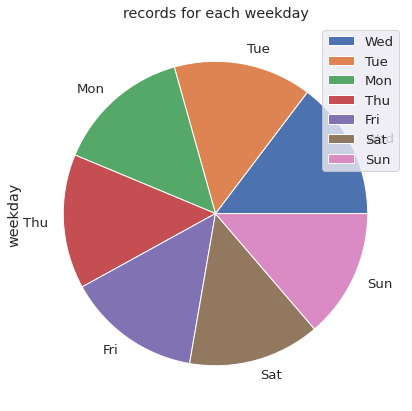

In [62]:
df_weekday_count = pd.DataFrame(covid_impact_on_airport_traffic_preprocessed["weekday"].value_counts())
g = df_weekday_count.plot.pie(y='weekday', figsize=(7, 7))
g.set_title("records for each weekday")

**Bivariate Analysis**

*Country and corresponding Baseline Percentage*

Text(0, 0.5, 'Percent of baseline')

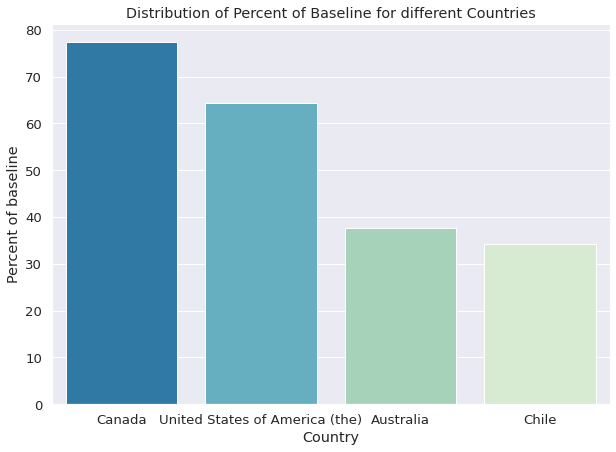

In [49]:
df1 = covid_impact_on_airport_traffic_preprocessed.groupby("Country")['PercentOfBaseline'].mean().sort_values(ascending = False).reset_index()
sns.set(font_scale = 1.2)
plt.figure(figsize = [10,7])
plt.title("Distribution of Percent of Baseline for different Countries")
sns.barplot(data = df1, x=  'Country', y = 'PercentOfBaseline',palette = 'GnBu_r')
plt.ylabel('Percent of baseline')

*State and corresponding Baseline Percentage*

Text(0.5, 0, 'Percent of baseline')

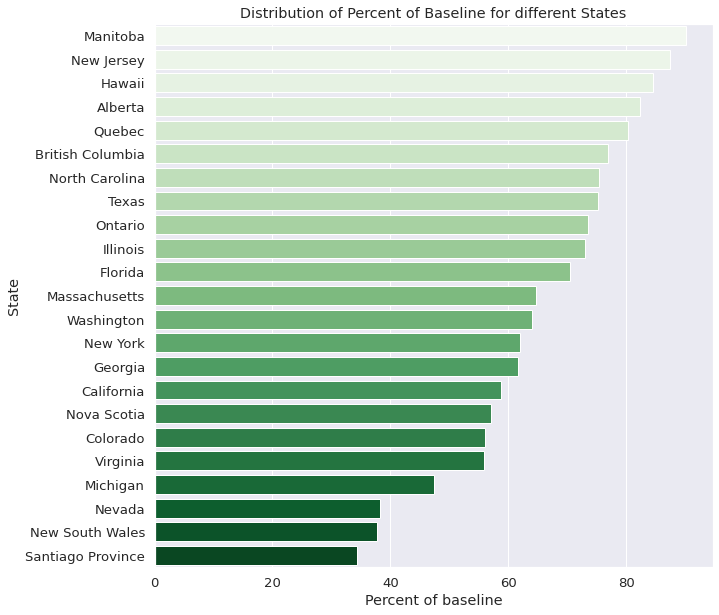

In [50]:
df1 = covid_impact_on_airport_traffic_preprocessed.groupby("State")['PercentOfBaseline'].mean().sort_values(ascending = False).reset_index()
sns.set(font_scale = 1.2)
plt.figure(figsize = [10,10])
plt.title("Distribution of Percent of Baseline for different States")
sns.barplot(data = df1, x = 'PercentOfBaseline', y = 'State',palette = 'Greens')
plt.xlabel("Percent of baseline")

*Cities and corresponding Baseline Percentage*

Text(0.5, 0, 'Percent of baseline')

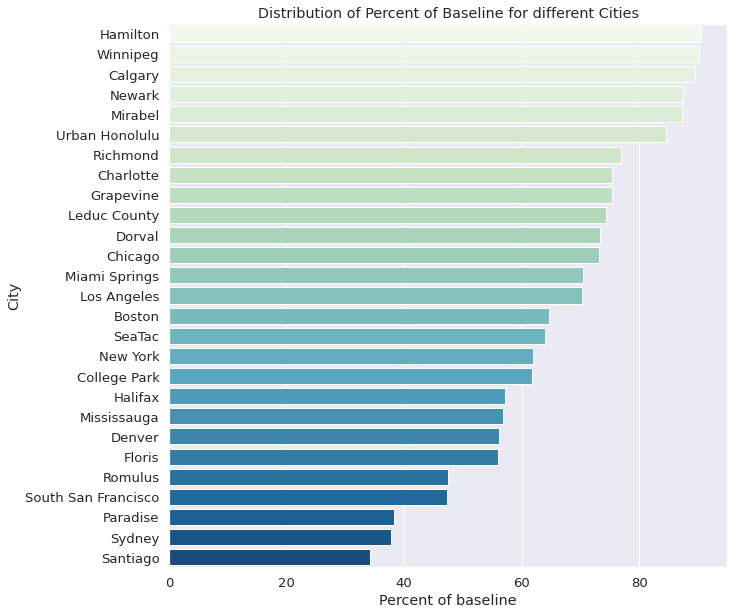

In [51]:
df1 = covid_impact_on_airport_traffic_preprocessed.groupby("City")['PercentOfBaseline'].mean().sort_values(ascending = False).reset_index()
sns.set(font_scale = 1.2)
plt.figure(figsize = [10,10])
plt.title("Distribution of Percent of Baseline for different Cities")
sns.barplot(data = df1, x = 'PercentOfBaseline', y ='City',palette = 'GnBu')
plt.xlabel("Percent of baseline")

*Airports and corresponding Baseline Percentages*

Text(0, 0.5, 'Airport name')

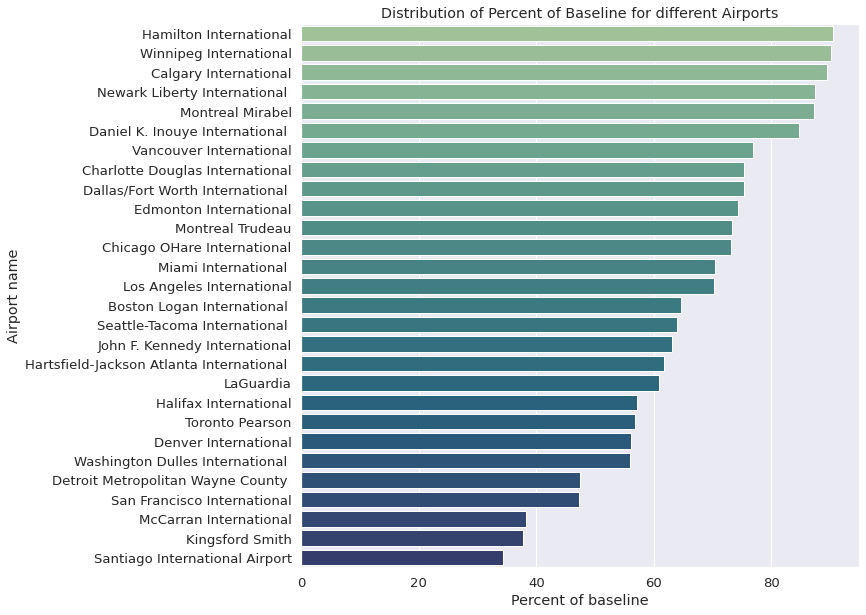

In [52]:
df1 = covid_impact_on_airport_traffic_preprocessed.groupby("AirportName")['PercentOfBaseline'].mean().sort_values(ascending = False).reset_index()
sns.set(font_scale =1.2)
plt.figure(figsize = [10,10])
sns.barplot(data = df1, x = 'PercentOfBaseline', y = 'AirportName',palette = 'crest')
plt.title("Distribution of Percent of Baseline for different Airports")
plt.xlabel('Percent of baseline')
plt.ylabel("Airport name")

## Airport Traffic Analysis Of The USA - Impact of Covid 19
Dataset specimen with the highest number of Airports

In [54]:
data_US = covid_impact_on_airport_traffic_preprocessed[covid_impact_on_airport_traffic_preprocessed['Country']=='United States of America (the)']
data_US.shape

(4441, 11)

In [57]:
df_usa_traff = pd.DataFrame(data_US.groupby('Date',as_index=True)['PercentOfBaseline'].mean())
df_usa_traff.head()

,PercentOfBaseline
Date,
2020-03-16,88.058824
2020-03-17,87.823529
2020-03-18,81.705882
2020-03-19,73.764706
2020-03-20,73.058824


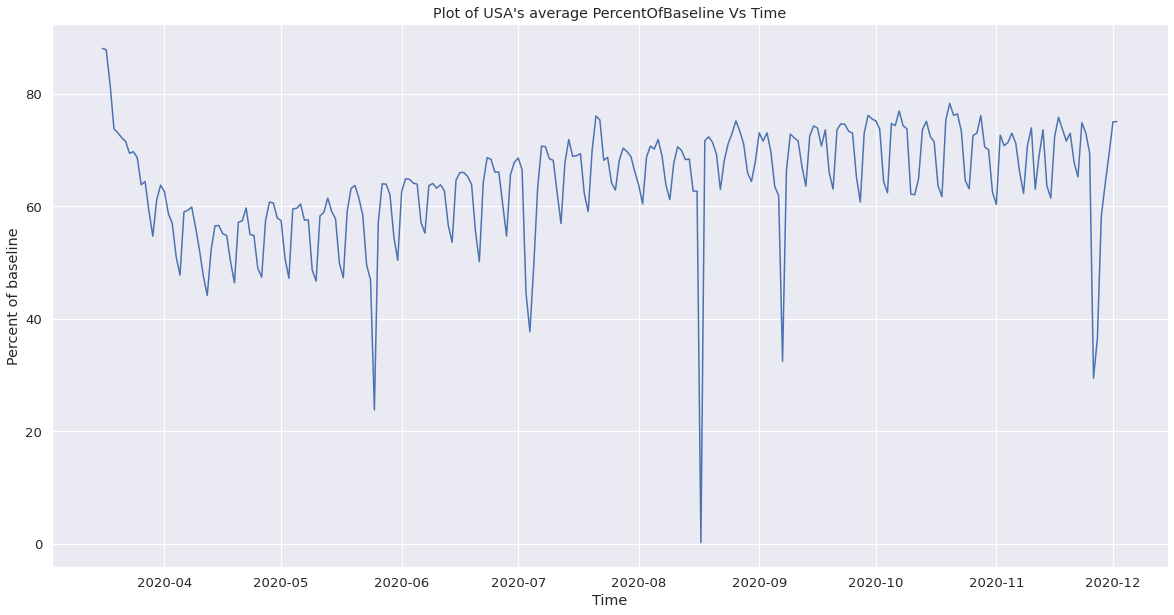

In [60]:
plt.figure(figsize=(20,10))
plt.plot(df_usa_traff)
plt.title("Plot of USA's average PercentOfBaseline Vs Time")
plt.xlabel("Time")
plt.ylabel("Percent of baseline")
plt.show()

## Airport Traffic Analysis Of Chile - Impact of Covid 19
Dataset specimen with the lowest number of Airports (only one)

In [63]:
data_Chile = covid_impact_on_airport_traffic_preprocessed[covid_impact_on_airport_traffic_preprocessed['Country']=='Chile']
data_Chile.shape

(238, 11)

In [68]:
data_Chile.nunique()

Date                 238
AirportName            1
PercentOfBaseline     61
City                   1
State                  1
ISO_3166_2             1
Country                1
Geography              1
weekday                7
long                   1
lat                    1
dtype: int64

In [72]:
df_chile_traff = pd.DataFrame(data_Chile.groupby('Date',as_index=True)['PercentOfBaseline'].mean())
df_chile_traff.head()

,PercentOfBaseline
Date,
2020-03-16,96.0
2020-03-17,72.0
2020-03-18,56.0
2020-03-19,52.0
2020-03-20,53.0


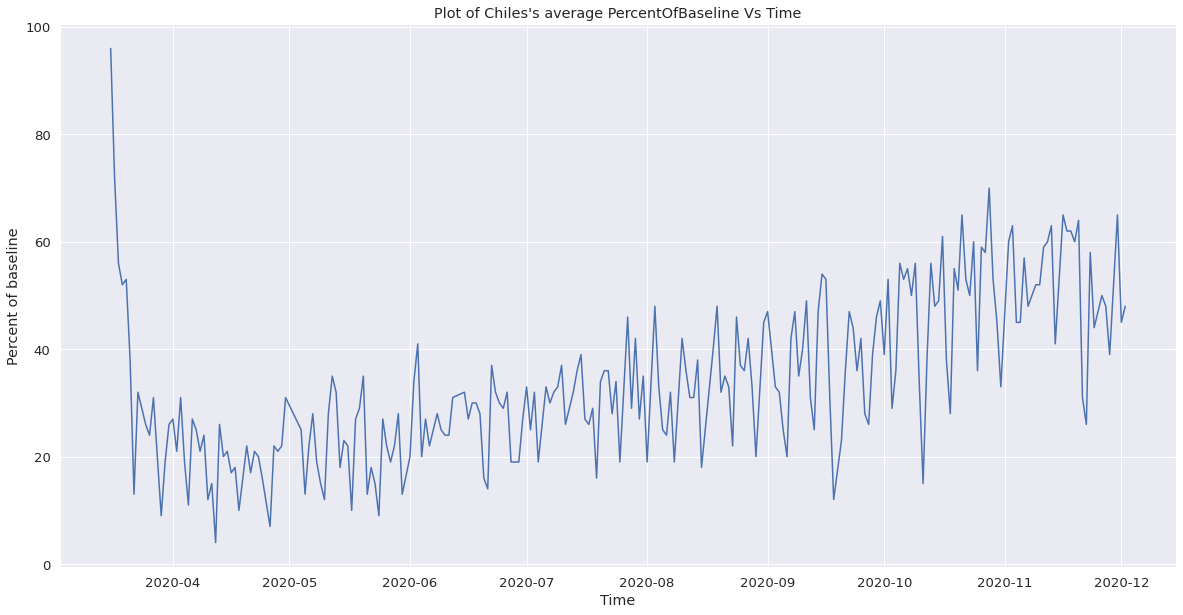

In [73]:
plt.figure(figsize=(20,10))
plt.plot(df_chile_traff)
plt.title("Plot of Chiles's average PercentOfBaseline Vs Time")
plt.xlabel("Time")
plt.ylabel("Percent of baseline")
plt.show()